In [51]:
import msgpack
import zlib
import pandas as pd

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

In [56]:
with open('TXF20190703.msgpack', 'rb') as f:
    rawdata = msgpack.loads(zlib.decompress(f.read()), raw=False)

In [57]:
rawdata.keys()

dict_keys(['Q/TFE/TXFG9/H9', 'Q/TFE/TXFG9/L9', 'L/TFE/TXFG9/L9', 'L/TFE/TXFI9', 'Q/TFE/TXFI9', 'Q/TFE/TXFF0', 'L/TFE/TXFL9', 'Q/TFE/TXFH9/L9', 'L/TFE/TXFG9/H9', 'Q/TFE/TXFG9', 'Q/TFE/TXFH9/F0', 'L/TFE/TXFG9', 'Q/TFE/TXFL9', 'L/TFE/TXFH9', 'Q/TFE/TXFH9/I9', 'Q/TFE/TXFL9/C0', 'Q/TFE/TXFC0', 'Q/TFE/TXFG9/F0', 'L/TFE/TXFG9/I9', 'L/TFE/TXFF0', 'Q/TFE/TXFG9/C0', 'Q/TFE/TXFG9/I9', 'Q/TFE/TXFH9', 'L/TFE/TXFG9/F0', 'Q/TFE/TXFC0/F0', 'Q/TFE/TXFI9/L9', 'L/TFE/TXFC0'])

In [58]:
tickdata = rawdata['L/TFE/TXFG9']

In [66]:
df_tick_comb = pd.DataFrame([len(tick['Close']) for tick in tickdata])

In [70]:
df_tick_comb.describe()

,0
count,47803.000000
mean,1.033554
std,0.216093
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,9.000000


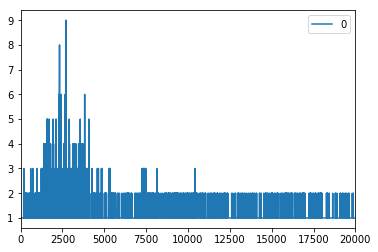

In [73]:
df_tick_comb.iloc[:20000].plot()

In [74]:
def split_data(rec, index):
    sp_rec = {}
    [sp_rec.update({k: v[index] if isinstance(v, (list, tuple)) else v}) 
     for k, v in rec.items()]
    sp_rec['idx'] = index
    return sp_rec

In [75]:
tickdata = [split_data(rec, ind) for rec in tickdata
                                 for ind, _ in enumerate(rec['Close'])][:]

In [76]:
badata = rawdata['Q/TFE/TXFG9']

In [77]:
tbdata = badata + tickdata
tbdata = sorted(tbdata, key=lambda d: d['t'])

In [78]:
ask_price1, ask_vol1, bid_price1, bid_vol1, ba_t = [0, 0, 0, 0, '']
tickdata_ba1 = []
for d in tbdata:
    if 'Close' in d:
        d['AskPrice_1'], d['AskVolume_1'] = ask_price1, ask_vol1
        d['BidPrice_1'], d['BidVolume_1'] = bid_price1, bid_vol1
        d['ba_t'] = ba_t
        tickdata_ba1.append(d)
    else:
        ask_price1, ask_vol1 = d['AskPrice'][0], d['AskVolume'][0]
        bid_price1, bid_vol1 = d['BidPrice'][0], d['BidVolume'][0]
        ba_t = d['t']

In [124]:
ask_price1, ask_price2, ask_price3, ask_price4, ask_price5 = [0, 0, 0, 0, 0]
ask_vol1, ask_vol2, ask_vol3, ask_vol4, ask_vol5 = [0, 0, 0, 0, 0]
bid_price1, bid_price2, bid_price3, bid_price4, bid_price5 = [0, 0, 0, 0, 0]
bid_vol1, bid_vol2, bid_vol3, bid_vol4, bid_vol5 = [0, 0, 0, 0, 0]
ba_t = ''
tickdata_ba1 = []
for d in tbdata:
    if 'Close' in d:
        d['AskPrice_1'], d['AskVolume_1'] = ask_price1, ask_vol1
        d['AskPrice_2'], d['AskVolume_2'] = ask_price2, ask_vol2
        d['AskPrice_3'], d['AskVolume_3'] = ask_price3, ask_vol3
        d['AskPrice_4'], d['AskVolume_4'] = ask_price4, ask_vol4
        d['AskPrice_5'], d['AskVolume_5'] = ask_price5, ask_vol5
        d['BidPrice_1'], d['BidVolume_1'] = bid_price1, bid_vol1
        d['BidPrice_2'], d['BidVolume_2'] = bid_price2, bid_vol2
        d['BidPrice_3'], d['BidVolume_3'] = bid_price3, bid_vol3
        d['BidPrice_4'], d['BidVolume_4'] = bid_price4, bid_vol4
        d['BidPrice_5'], d['BidVolume_5'] = bid_price5, bid_vol5
        d['ba_t'] = ba_t
        tickdata_ba1.append(d)
    else:
        ask_price1, ask_vol1 = d['AskPrice'][0], d['AskVolume'][0]
        ask_price2, ask_vol2 = d['AskPrice'][1], d['AskVolume'][1]
        ask_price3, ask_vol3 = d['AskPrice'][2], d['AskVolume'][2]
        ask_price4, ask_vol4 = d['AskPrice'][3], d['AskVolume'][3]
        ask_price5, ask_vol5 = d['AskPrice'][4], d['AskVolume'][4]
        bid_price1, bid_vol1 = d['BidPrice'][0], d['BidVolume'][0]
        bid_price2, bid_vol2 = d['BidPrice'][1], d['BidVolume'][1]
        bid_price3, bid_vol3 = d['BidPrice'][2], d['BidVolume'][2]
        bid_price4, bid_vol4 = d['BidPrice'][3], d['BidVolume'][3]
        bid_price5, bid_vol5 = d['BidPrice'][4], d['BidVolume'][4]
        ba_t = d['t']

In [125]:
df_tickba = pd.DataFrame(tickdata_ba1)
df_tickba = df_tickba[df_tickba['Simtrade'] != 1].copy()

In [126]:
df_tickba['ts'] = pd.to_datetime(df_tickba['t']) + pd.Timedelta(hours=8)
df_tickba['ba_ts'] = pd.to_datetime(df_tickba['ba_t']) + pd.Timedelta(hours=8)

In [127]:
df_tickba[['ts', 'ba_ts', 
           'Close', 'Volume', 
           'AskPrice_1', 'BidPrice_1', 
           'AskVolume_1', 'BidVolume_1']].head()

,ts,ba_ts,Close,Volume,AskPrice_1,BidPrice_1,AskVolume_1,BidVolume_1
179,2019-07-03 08:45:00.027319,2019-07-03 08:44:55.008299,10733.0,400,10739.0,10738.0,1,26
180,2019-07-03 08:45:00.105354,2019-07-03 08:45:00.039914,10733.0,7,10733.0,10732.0,14,24
181,2019-07-03 08:45:00.109463,2019-07-03 08:45:00.039914,10733.0,3,10733.0,10732.0,14,24
182,2019-07-03 08:45:00.113326,2019-07-03 08:45:00.039914,10733.0,4,10733.0,10732.0,14,24
183,2019-07-03 08:45:00.131955,2019-07-03 08:45:00.039914,10734.0,3,10733.0,10732.0,14,24


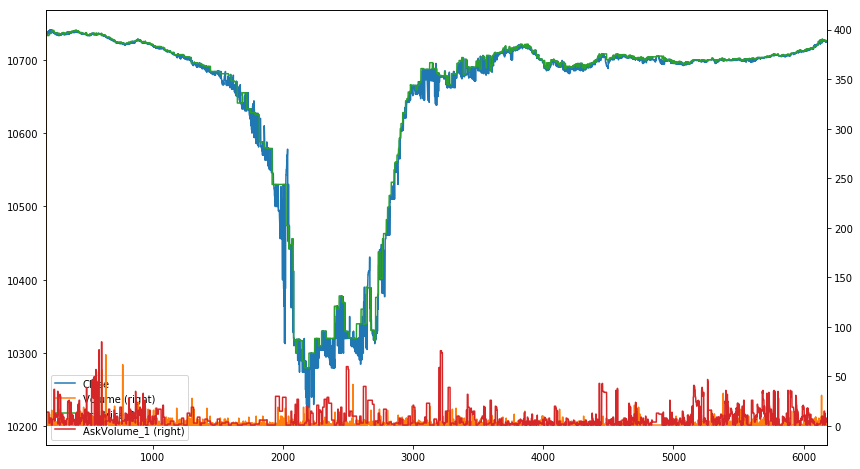

In [84]:
fig, ax = plt.subplots()
df_tickba.iloc[:6000][['Close']].plot(ax=ax, figsize=(14, 8))
df_tickba.iloc[:6000][['Volume']].plot(ax=ax, secondary_y=True)
df_tickba.iloc[:6000][['AskPrice_1']].plot(ax=ax, figsize=(14, 8))
df_tickba.iloc[:6000][['AskVolume_1']].plot(ax=ax, secondary_y=True)

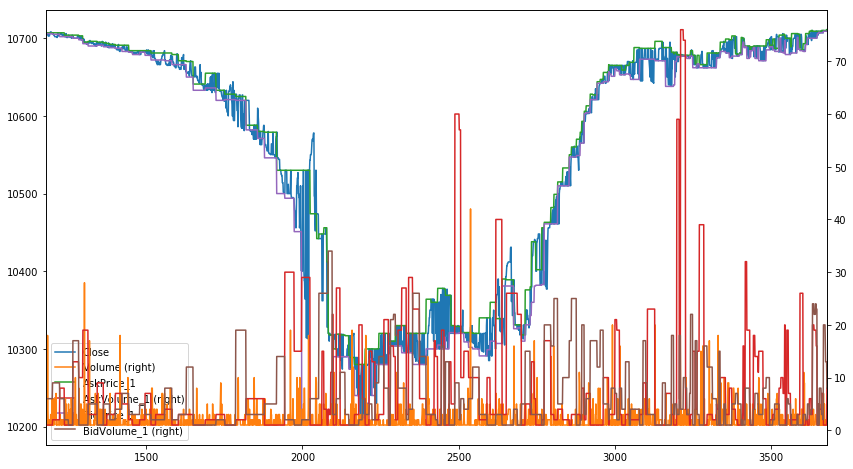

In [85]:
fig, ax = plt.subplots()
st, ed = 1000, 3500
df_tickba.iloc[st:ed][['Close']].plot(ax=ax, figsize=(14, 8))
df_tickba.iloc[st:ed][['Volume']].plot(ax=ax, secondary_y=True)
df_tickba.iloc[st:ed][['AskPrice_1']].plot(ax=ax, figsize=(14, 8))
df_tickba.iloc[st:ed][['AskVolume_1']].plot(ax=ax, secondary_y=True)
df_tickba.iloc[st:ed][['BidPrice_1']].plot(ax=ax, figsize=(14, 8))
df_tickba.iloc[st:ed][['BidVolume_1']].plot(ax=ax, secondary_y=True)

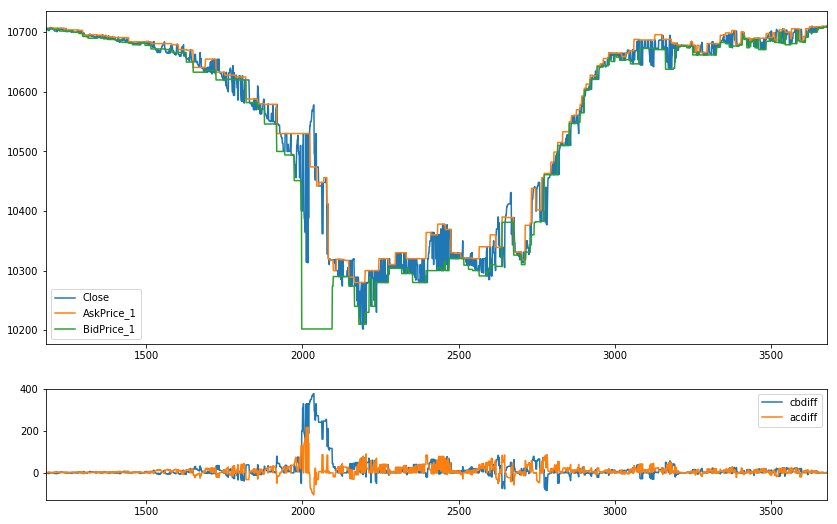

In [101]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios':[3, 1]})
st, ed = 1000, 3500
df_tickba.iloc[st:ed][['Close']].plot(ax=ax[0], figsize=(14, 9))
df_tickba.iloc[st:ed][['AskPrice_1']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['BidPrice_1']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['cbdiff', 'acdiff']].plot(ax=ax[1])

In [129]:
df_tickba['cbdiff'] = df_tickba['Close'] - df_tickba['BidPrice_1']
df_tickba['acdiff'] = df_tickba['AskPrice_1'] - df_tickba['Close']

In [134]:
df_tickba['abdiff'] = df_tickba['AskPrice_1'] - df_tickba['BidPrice_1']

In [130]:
df_tickba['tsdiff'] = (df_tickba['ts'] - df_tickba['ba_ts']).astype(int) / 1000000000

In [131]:
df_tickba['tsdiff'].head()

179    5.019020
180    0.065440
181    0.069549
182    0.073412
183    0.092041
Name: tsdiff, dtype: float64

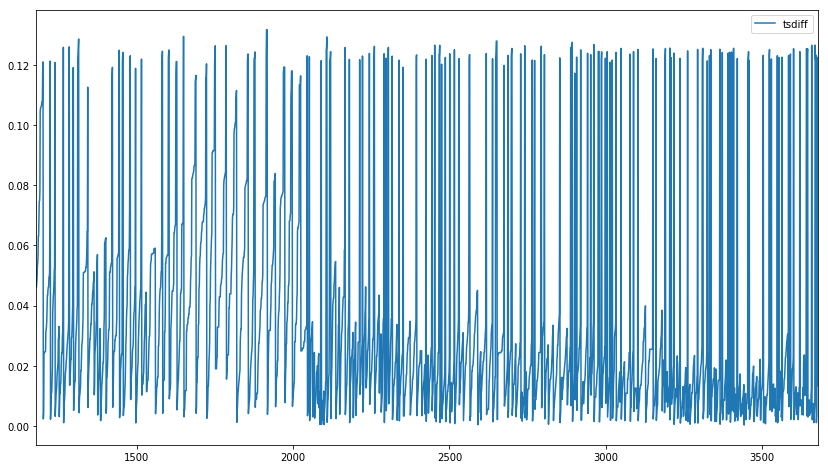

In [132]:
df_tickba.iloc[st:ed][['tsdiff']].plot(figsize=(14, 8))

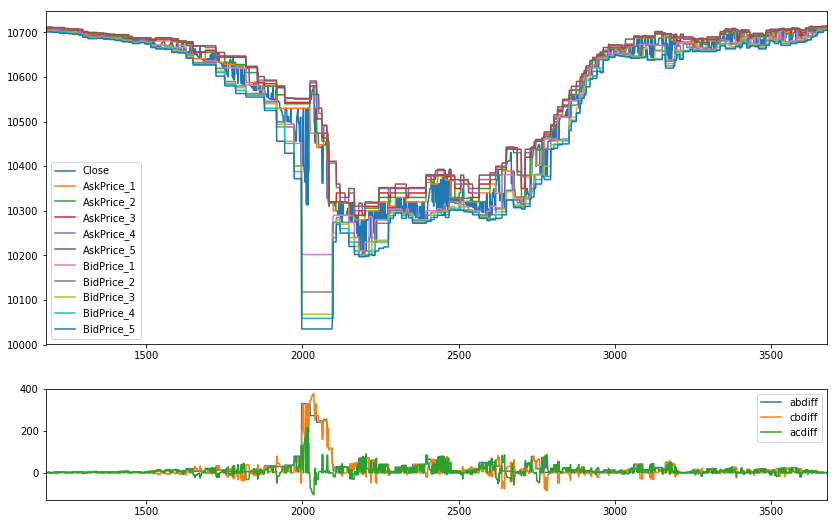

In [135]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios':[3, 1]})
st, ed = 1000, 3500
df_tickba.iloc[st:ed][['Close']].plot(ax=ax[0], figsize=(14, 9))
df_tickba.iloc[st:ed][['AskPrice_1', 'AskPrice_2', 'AskPrice_3', 'AskPrice_4', 'AskPrice_5']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['BidPrice_1', 'BidPrice_2', 'BidPrice_3', 'BidPrice_4', 'BidPrice_5']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['abdiff', 'cbdiff', 'acdiff']].plot(ax=ax[1])

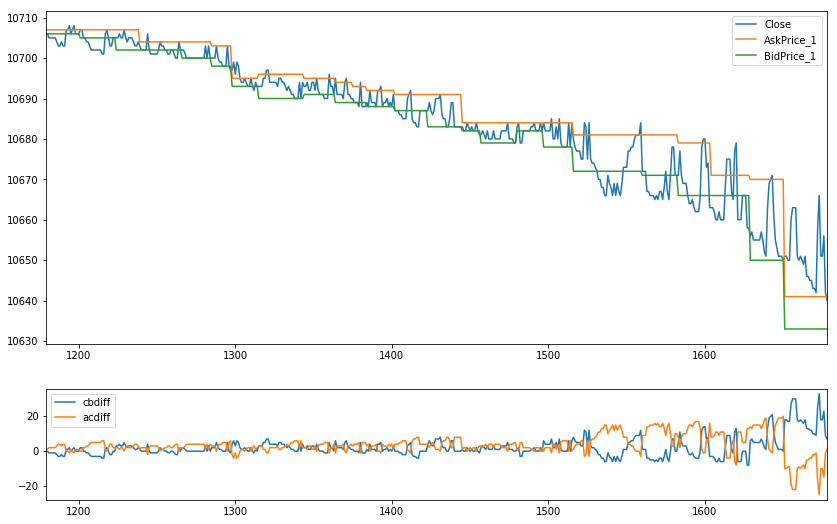

In [165]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios':[3, 1]})
st, ed = 1000, 1500
df_tickba.iloc[st:ed][['Close']].plot(ax=ax[0], figsize=(14, 9))
df_tickba.iloc[st:ed][['AskPrice_1']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['BidPrice_1']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['cbdiff', 'acdiff']].plot(ax=ax[1])

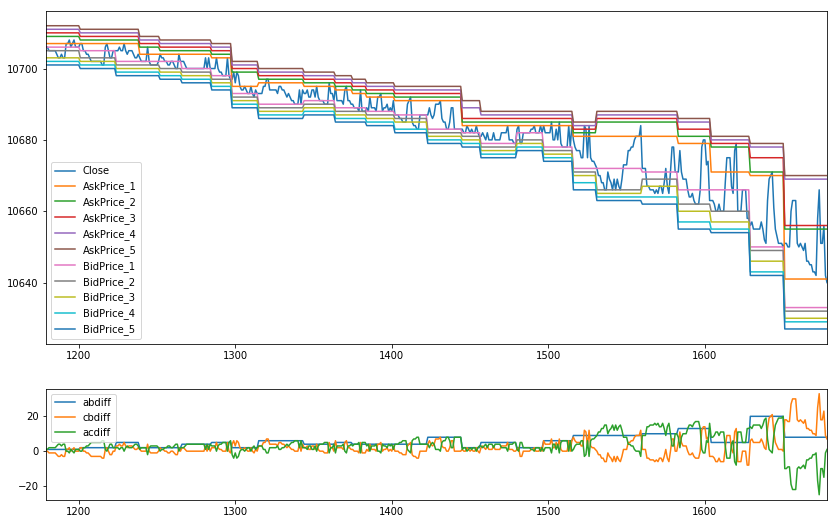

In [137]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios':[3, 1]})
st, ed = 1000, 1500
df_tickba.iloc[st:ed][['Close']].plot(ax=ax[0], figsize=(14, 9))
df_tickba.iloc[st:ed][['AskPrice_1', 'AskPrice_2', 'AskPrice_3', 'AskPrice_4', 'AskPrice_5']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['BidPrice_1', 'BidPrice_2', 'BidPrice_3', 'BidPrice_4', 'BidPrice_5']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['abdiff', 'cbdiff', 'acdiff']].plot(ax=ax[1])

/home/yvictor/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/home/yvictor/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


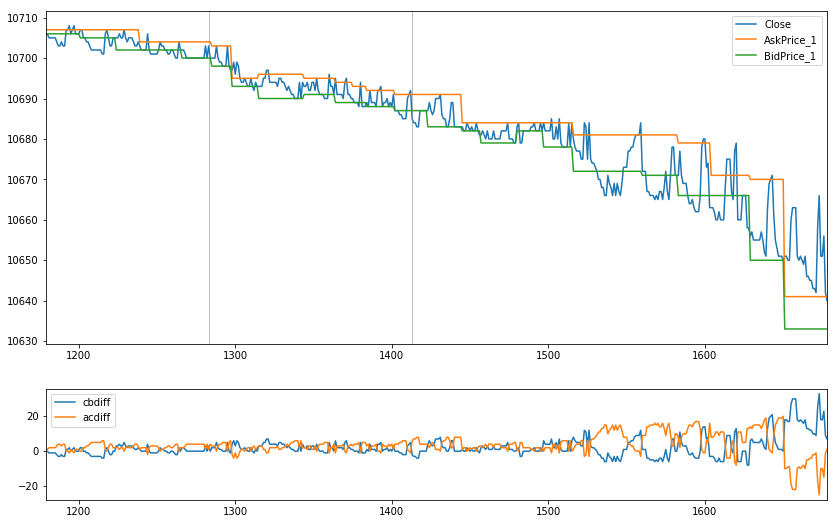

In [166]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios':[3, 1]})
st, ed = 1000, 1500
df_tickba.iloc[st:ed][['Close']].plot(ax=ax[0], figsize=(14, 9))
df_tickba.iloc[st:ed][['AskPrice_1']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['BidPrice_1']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['cbdiff', 'acdiff']].plot(ax=ax[1])
arr_second = df_tickba.reset_index().set_index('ts').resample('1s').agg({'index': 'first'})['index'].values
arr_second = arr_second[(arr_second>st)&(arr_second<ed)]
for idx in arr_second:
    ax[0].axvline(idx, color='gray', linestyle='-', lw=0.5)

/home/yvictor/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/home/yvictor/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


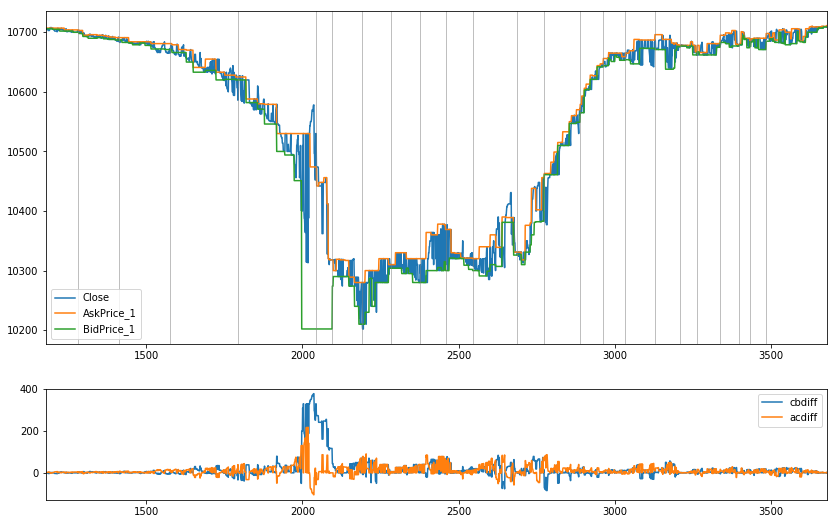

In [174]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios':[3, 1]})
st, ed = 1000, 3500
df_tickba.iloc[st:ed][['Close']].plot(ax=ax[0], figsize=(14, 9))
df_tickba.iloc[st:ed][['AskPrice_1']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['BidPrice_1']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['cbdiff', 'acdiff']].plot(ax=ax[1])
arr_second = df_tickba.reset_index().set_index('ts').resample('1s').agg({'index': 'first'})['index'].values
arr_idx = arr_second[(arr_second>st)&(arr_second<ed)]
for idx in arr_idx:
    ax[0].axvline(idx, color='gray', linestyle='-', lw=0.5)

/home/yvictor/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/home/yvictor/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


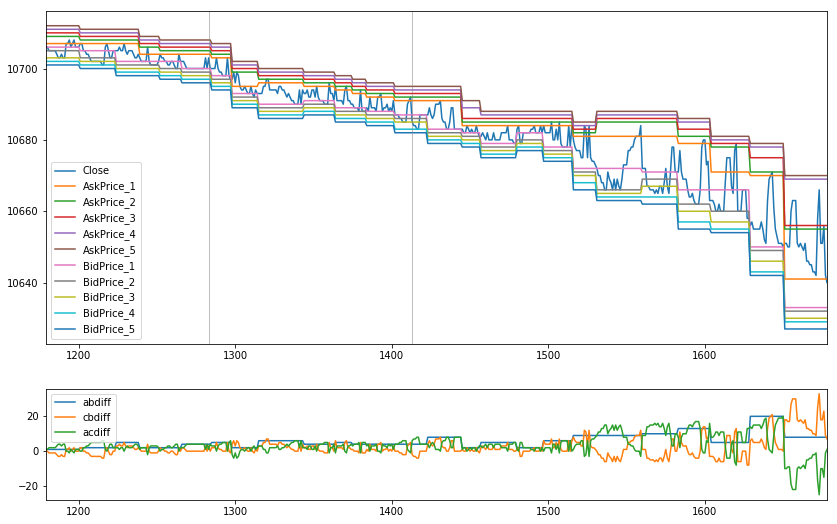

In [175]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios':[3, 1]})
st, ed = 1000, 1500
df_tickba.iloc[st:ed][['Close']].plot(ax=ax[0], figsize=(14, 9))
df_tickba.iloc[st:ed][['AskPrice_1', 'AskPrice_2', 'AskPrice_3', 'AskPrice_4', 'AskPrice_5']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['BidPrice_1', 'BidPrice_2', 'BidPrice_3', 'BidPrice_4', 'BidPrice_5']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['abdiff', 'cbdiff', 'acdiff']].plot(ax=ax[1])
arr_idx = arr_second[(arr_second>st)&(arr_second<ed)]
for idx in arr_idx:
    ax[0].axvline(idx, color='gray', linestyle='-', lw=0.5)

/home/yvictor/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/home/yvictor/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys


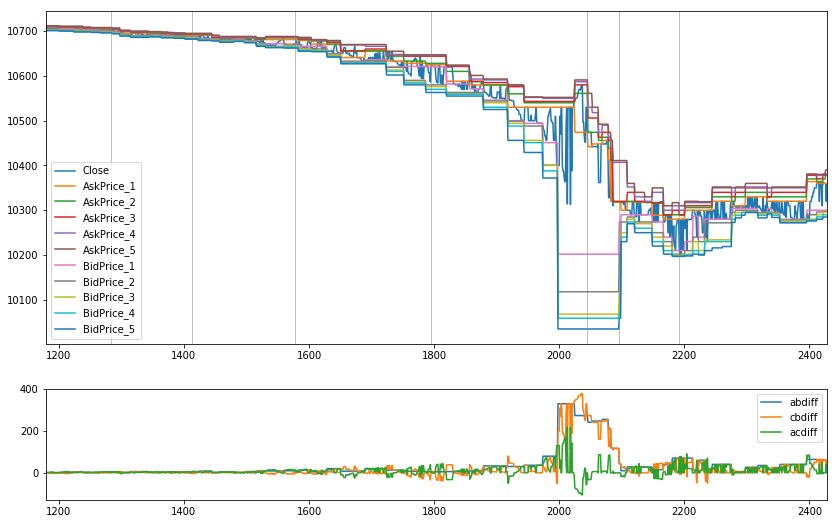

In [177]:
fig, ax = plt.subplots(nrows=2, gridspec_kw={'height_ratios':[3, 1]})
st, ed = 1000, 2250
df_tickba.iloc[st:ed][['Close']].plot(ax=ax[0], figsize=(14, 9))
df_tickba.iloc[st:ed][['AskPrice_1', 'AskPrice_2', 'AskPrice_3', 'AskPrice_4', 'AskPrice_5']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['BidPrice_1', 'BidPrice_2', 'BidPrice_3', 'BidPrice_4', 'BidPrice_5']].plot(ax=ax[0])
df_tickba.iloc[st:ed][['abdiff', 'cbdiff', 'acdiff']].plot(ax=ax[1])
arr_idx = arr_second[(arr_second>st)&(arr_second<ed)]
for idx in arr_idx:
    ax[0].axvline(idx, color='gray', linestyle='-', lw=0.5)

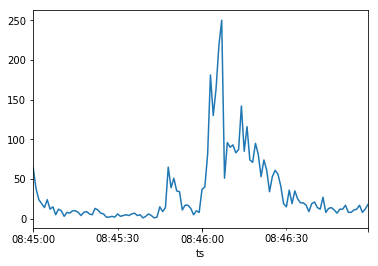

In [188]:
df_tickba.set_index('ts').resample('1s')['Close'].count().iloc[:120].plot()

In [189]:
df_tickba.set_index('ts').resample('1s')['Close'].count().describe()

count    72900.000000
mean         0.673649
std          3.067544
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        250.000000
Name: Close, dtype: float64

In [190]:
df_tickba.set_index('ts').resample('1s')['Close'].count().iloc[:120].describe()

count    120.000000
mean      32.991667
std       44.056399
min        1.000000
25%        8.000000
50%       14.000000
75%       39.250000
max      250.000000
Name: Close, dtype: float64